In [1]:
#from google.colab import files
#uploaded = files.upload()


#1. Data description

In [2]:
# google.colab import files
import pandas as pd
import numpy as np
# Load CSV data
data = pd.read_csv('data.csv', encoding='latin', low_memory=False)
data = pd.DataFrame(data)
display(data.head())
data.info()

,gesture_id,tap,app_name,origin_first_finger,pressure_first_finger,time_stamp_first,size_first_finger,x_coordinate_first_finger,y_coordinate_first_finger,distance,iskid
0,76,Tap,NaN,False,42,1504800509763,4.0,326,944,0.0,1
1,33,Tap,NaN,False,30,1504192489823,4.0,158,1535,0.0,1
2,37,Swipe,com.google.android.apps.photos,True,39,1507562393497,3.0,1192,1303,0.0,0
3,82,Tap,com.mehequanna.gestureplayground,False,43,1504800515915,4.0,154,1491,0.0,1
4,43,Swipe,com.google.android.apps.photos,True,56,1500219771288,7.0,624,1477,0.0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17072 entries, 0 to 17071
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   gesture_id                 17072 non-null  int64  
 1   tap                        17072 non-null  object 
 2   app_name                   10101 non-null  object 
 3   origin_first_finger        17072 non-null  bool   
 4   pressure_first_finger      17072 non-null  int64  
 5   time_stamp_first           17072 non-null  int64  
 6   size_first_finger          17069 non-null  float64
 7   x_coordinate_first_finger  17072 non-null  int64  
 8   y_coordinate_first_finger  17072 non-null  int64  
 9   distance                   17072 non-null  float64
 10  iskid                      17072 non-null  int64  
dtypes: bool(1), float64(2), int64(6), object(2)
memory usage: 1.3+ MB


# 1.1. Features

In [3]:
print(data.columns)

Index(['gesture_id', 'tap', 'app_name', 'origin_first_finger',
       'pressure_first_finger', 'time_stamp_first', 'size_first_finger',
       'x_coordinate_first_finger', 'y_coordinate_first_finger', 'distance',
       'iskid'],
      dtype='object')


## 1.2. Unique values discovery

In [4]:
for column in data.columns:
    # Print the column name and its unique values
    print(f"Column '{column}': {data[column].unique()}")

Column 'gesture_id': [ 76  33  37  82  43 157 116 326  59 258 164  77 261  30 109  17 131  46
 108 184 124  42  38 125  23  32 127  65  75 182 199 277 186 197 294 137
 372 216 272 273 270 174  52 238 491  16 352 135   6 388  79 301 225 122
 101 232 256  95 144 130 202 177  56 212 247  99 214  94 323 269 159 330
 166 138 246  69 207  88 198 162 196  57 206 396 222 466  66 318   4 282
  11 224  74 151 268  93 291 154 440 105  50 193 179 227 252 493 283  98
  92   2 106 107 341 185 201 373  20  72 236  84  19 254  10 335 336 299
 191 262 295  83  70 161 347 255  87 155 304  64 321 200 150 469 417 239
 143 121  18 100 215 213 183 509 281 271 118  80 158  12 260  34 156 296
  78 366 259  27  89  68 251   5 237 226 165  51 163 387 204 175  54 241
 263 257 292 390  24 242 145 332  40 446  41 168 288 284 327 278 173  26
 245  97 104 359 248 208 187 307  53 454 353 148  21 169 172 210  71 460
   7 140 315 306 274 369 356  47 279 334 211 538 322 102 266  58 146 123
 205 170 264 233 358  13 445 1

# 2. Data preprocesssig

## 2.1. Data cleaning

In [5]:
# Count the number on nan values for each feature
nan_counts = data.isna().sum()
print("NaN values in each column:")
print(nan_counts)


NaN values in each column:
gesture_id                      0
tap                             0
app_name                     6971
origin_first_finger             0
pressure_first_finger           0
time_stamp_first                0
size_first_finger               3
x_coordinate_first_finger       0
y_coordinate_first_finger       0
distance                        0
iskid                           0
dtype: int64


In [6]:
# Replace NaN values in the 'app name' column with 'Other'
data['app_name'].fillna('Other', inplace=True)


In [7]:
#methode that drop the column that have many nan values
#data.drop(columns=['app_name'], inplace=True)

In [8]:
# Count the number of NaN values in each column
nan_counts = data.isna().sum()

# Print the number of NaN values for each column
print("NaN values in each column:")
print(nan_counts)

NaN values in each column:
gesture_id                   0
tap                          0
app_name                     0
origin_first_finger          0
pressure_first_finger        0
time_stamp_first             0
size_first_finger            3
x_coordinate_first_finger    0
y_coordinate_first_finger    0
distance                     0
iskid                        0
dtype: int64


In [9]:
# Drop null values
data = data.dropna()
print(data.isna().sum())


gesture_id                   0
tap                          0
app_name                     0
origin_first_finger          0
pressure_first_finger        0
time_stamp_first             0
size_first_finger            0
x_coordinate_first_finger    0
y_coordinate_first_finger    0
distance                     0
iskid                        0
dtype: int64


##2.2. Data Visualisation

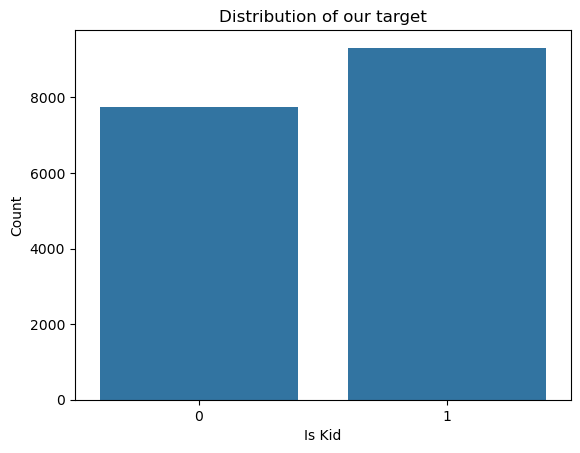

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the column 'iskid'
sns.countplot(x='iskid', data=data)

# Add labels and title
plt.xlabel('Is Kid')
plt.ylabel('Count')
plt.title('Distribution of our target')

# Show the plot
plt.show()


* IsKiD is our target
* If it has 1 ; it's a kid
* else it's a parent

In [11]:
# Print possible values of the 'tap' column
print("Possible values of 'tap':")
print(data['tap'].value_counts())

# Print possible values of the 'app_name' column
print("\nPossible values of 'app_name':")
print(data['app_name'].value_counts())

# Print possible values of the 'origin_first_finger' column
print("\nPossible values of 'origin_first_finger':")
print(data['origin_first_finger'].value_counts())


Possible values of 'tap':
tap
Swipe           7036
Tap             7028
Unidentified    2660
Scroll           198
TwoFinger        116
LongPress         31
Name: count, dtype: int64

Possible values of 'app_name':
app_name
Other                                      6970
com.google.android.apps.photos             6843
com.mehequanna.gestureplayground           1369
com.google.android.youtube                 1056
com.google.android.googlequicksearchbox     618
com.touchlogger                             159
com.android.systemui                         15
com.android.vending                           7
com.appvv.os9launcherhd                       7
com.talkatone.android                         6
com.google.android.gms                        5
com.android.chrome                            4
com.google.android.calendar                   3
com.google.android.apps.magazines             2
com.isispoly.DemoDrawAPIN                     2
com.google.android.GoogleCamera               1
com.andro

In [12]:
#from sklearn.preprocessing import LabelEncoder

# Make a copy of the original data
#data_e = data.copy()

# Initialize LabelEncoder
#label_encoder = LabelEncoder()

# Encode 'tap' column
#data_e['tap'] = label_encoder.fit_transform(data_e['tap'])

# Encode 'app_name' column
#data_e['app_name'] = label_encoder.fit_transform(data_e['app_name'])
#data_e['origin_first_finger'] = label_encoder.fit_transform(data_e['origin_first_finger'])


#Here we will try Encoding with dummy Methode

In [13]:
data.head()

,gesture_id,tap,app_name,origin_first_finger,pressure_first_finger,time_stamp_first,size_first_finger,x_coordinate_first_finger,y_coordinate_first_finger,distance,iskid
0,76,Tap,Other,False,42,1504800509763,4.0,326,944,0.0,1
1,33,Tap,Other,False,30,1504192489823,4.0,158,1535,0.0,1
2,37,Swipe,com.google.android.apps.photos,True,39,1507562393497,3.0,1192,1303,0.0,0
3,82,Tap,com.mehequanna.gestureplayground,False,43,1504800515915,4.0,154,1491,0.0,1
4,43,Swipe,com.google.android.apps.photos,True,56,1500219771288,7.0,624,1477,0.0,0


In [14]:
df_encoded = pd.get_dummies(data, columns=['tap', 'app_name','origin_first_finger'])


In [15]:
df_encoded

,gesture_id,pressure_first_finger,time_stamp_first,size_first_finger,x_coordinate_first_finger,y_coordinate_first_finger,distance,iskid,tap_LongPress,tap_Scroll,...,app_name_com.google.android.gms,app_name_com.google.android.googlequicksearchbox,app_name_com.google.android.play.games,app_name_com.google.android.youtube,app_name_com.isispoly.DemoDrawAPIN,app_name_com.mehequanna.gestureplayground,app_name_com.talkatone.android,app_name_com.touchlogger,origin_first_finger_False,origin_first_finger_True
0,76,42,1504800509763,4.0,326,944,0.0,1,False,False,...,False,False,False,False,False,False,False,False,True,False
1,33,30,1504192489823,4.0,158,1535,0.0,1,False,False,...,False,False,False,False,False,False,False,False,True,False
2,37,39,1507562393497,3.0,1192,1303,0.0,0,False,False,...,False,False,False,False,False,False,False,False,False,True
3,82,43,1504800515915,4.0,154,1491,0.0,1,False,False,...,False,False,False,False,False,True,False,False,True,False
4,43,56,1500219771288,7.0,624,1477,0.0,0,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17067,151,25,1504204183097,2.0,952,1491,0.0,0,False,False,...,False,False,False,False,False,False,False,False,False,True
17068,241,55,1504720432749,6.0,588,1535,0.0,0,False,False,...,False,False,False,False,False,True,False,False,True,False
17069,171,55,1504193922230,5.0,919,1558,0.0,1,False,False,...,False,False,False,False,False,False,False,False,False,True
17070,308,26,1504798428016,2.0,1274,1479,0.0,1,False,False,...,False,False,False,False,False,False,False,False,False,True


In [16]:
df_encoded.drop(columns=['gesture_id'], inplace=True)

In [19]:
print(df_encoded.head())

   pressure_first_finger  time_stamp_first  size_first_finger  \
0                     42     1504800509763                4.0   
1                     30     1504192489823                4.0   
2                     39     1507562393497                3.0   
3                     43     1504800515915                4.0   
4                     56     1500219771288                7.0   

   x_coordinate_first_finger  y_coordinate_first_finger  distance  iskid  \
0                        326                        944       0.0      1   
1                        158                       1535       0.0      1   
2                       1192                       1303       0.0      0   
3                        154                       1491       0.0      1   
4                        624                       1477       0.0      0   

   tap_LongPress  tap_Scroll  tap_Swipe  ...  app_name_com.google.android.gms  \
0          False       False      False  ...                           

##3-Machine Learning :

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Split data into features (X) and target variable (y)
X = df_encoded.drop(columns=['iskid','time_stamp_first'])
y = df_encoded['iskid']

In [42]:
print(X.columns)


Index(['pressure_first_finger', 'size_first_finger',
       'x_coordinate_first_finger', 'y_coordinate_first_finger', 'distance',
       'tap_LongPress', 'tap_Scroll', 'tap_Swipe', 'tap_Tap', 'tap_TwoFinger',
       'tap_Unidentified', 'app_name_Other', 'app_name_com.android.chrome',
       'app_name_com.android.documentsui', 'app_name_com.android.systemui',
       'app_name_com.android.vending', 'app_name_com.appvv.os9launcherhd',
       'app_name_com.google.android.GoogleCamera',
       'app_name_com.google.android.apps.magazines',
       'app_name_com.google.android.apps.photos',
       'app_name_com.google.android.calendar',
       'app_name_com.google.android.gms',
       'app_name_com.google.android.googlequicksearchbox',
       'app_name_com.google.android.play.games',
       'app_name_com.google.android.youtube',
       'app_name_com.isispoly.DemoDrawAPIN',
       'app_name_com.mehequanna.gestureplayground',
       'app_name_com.talkatone.android', 'app_name_com.touchlogger',
 

In [43]:
print(y.columns)

AttributeError: 'Series' object has no attribute 'columns'

In [21]:
from sklearn.preprocessing import StandardScaler
# Standardize numerical features
scaler = StandardScaler()
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd

# Train K-Nearest Neighbors model
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("K-Nearest Neighbors Accuracy:", accuracy_knn)

# Print confusion matrix for K-Nearest Neighbors
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("\nConfusion Matrix for K-Nearest Neighbors:")
print(pd.DataFrame(cm_knn, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1']))
print("\n")

# Train Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

# Print confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix for Random Forest:")
print(pd.DataFrame(cm_rf, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1']))
print("\n")

# Train Decision Tree model
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train_scaled, y_train)
y_pred_dt = tree.predict(X_test_scaled)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

# Print confusion matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("\nConfusion Matrix for Decision Tree:")
print(pd.DataFrame(cm_dt, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1']))
print("\n")

# Train Support Vector Machine (SVM) model
svm = SVC(random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Support Vector Machine (SVM) Accuracy:", accuracy_svm)

# Print confusion matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("\nConfusion Matrix for Support Vector Machine (SVM):")
print(pd.DataFrame(cm_svm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1']))
print("\n")


K-Nearest Neighbors Accuracy: 0.606912712360867

Confusion Matrix for K-Nearest Neighbors:
          Predicted 0  Predicted 1
Actual 0          861          681
Actual 1          661         1211


Random Forest Accuracy: 0.6262448740480375

Confusion Matrix for Random Forest:
          Predicted 0  Predicted 1
Actual 0          873          669
Actual 1          607         1265


Decision Tree Accuracy: 0.5814294083186877

Confusion Matrix for Decision Tree:
          Predicted 0  Predicted 1
Actual 0          846          696
Actual 1          733         1139


Support Vector Machine (SVM) Accuracy: 0.6265377855887522

Confusion Matrix for Support Vector Machine (SVM):
          Predicted 0  Predicted 1
Actual 0          723          819
Actual 1          456         1416




##4- Training with Cross Validation Methode

In [23]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
# Train K-Nearest Neighbors model with cross-validation
knn_cv = KNeighborsClassifier()
accuracy_knn_cv = cross_val_score(knn_cv, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("K-Nearest Neighbors Cross-Validation Accuracies:", accuracy_knn_cv)
print("Mean Accuracy:", accuracy_knn_cv.mean())

# Train Random Forest model with cross-validation
rf_cv = RandomForestClassifier(random_state=42)
accuracy_rf_cv = cross_val_score(rf_cv, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("\nRandom Forest Cross-Validation Accuracies:", accuracy_rf_cv)
print("Mean Accuracy:", accuracy_rf_cv.mean())

# Train Decision Tree model with cross-validation
dt_cv = DecisionTreeClassifier(random_state=42)
accuracy_dt_cv = cross_val_score(dt_cv, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("\nDecision Tree Cross-Validation Accuracies:", accuracy_dt_cv)
print("Mean Accuracy:", accuracy_dt_cv.mean())


K-Nearest Neighbors Cross-Validation Accuracies: [0.59209081 0.59465397 0.58147199 0.58623215 0.57964116]
Mean Accuracy: 0.586818015378982

Random Forest Cross-Validation Accuracies: [0.61039912 0.62504577 0.61589161 0.60600513 0.61332845]
Mean Accuracy: 0.6141340168436471

Decision Tree Cross-Validation Accuracies: [0.55547419 0.57964116 0.58257049 0.55913585 0.55254486]
Mean Accuracy: 0.5658733064811424


##Neural Network Model

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import pandas as pd

# Define your features X and target variable y

# Perform feature scaling if necessary

# Train K-Nearest Neighbors model with cross-validation
knn_cv = KNeighborsClassifier()
accuracy_knn_cv = cross_val_score(knn_cv, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("K-Nearest Neighbors Cross-Validation Accuracies:", accuracy_knn_cv)
print("Mean Accuracy:", accuracy_knn_cv.mean())

# Train Random Forest model with cross-validation
rf_cv = RandomForestClassifier(random_state=42)
accuracy_rf_cv = cross_val_score(rf_cv, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("\nRandom Forest Cross-Validation Accuracies:", accuracy_rf_cv)
print("Mean Accuracy:", accuracy_rf_cv.mean())

# Train Decision Tree model with cross-validation
dt_cv = DecisionTreeClassifier(random_state=42)
accuracy_dt_cv = cross_val_score(dt_cv, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("\nDecision Tree Cross-Validation Accuracies:", accuracy_dt_cv)
print("Mean Accuracy:", accuracy_dt_cv.mean())
rf_cv.fit(X_train_scaled, y_train)

#svm_cv = SVC(kernel='linear', random_state=42)
#accuracy_svm_cv = cross_val_score(svm_cv, X_train_scaled, y_train, cv=5, scoring='accuracy')
#print("\nSVM Cross-Validation Accuracies:", accuracy_svm_cv)
#print("Mean Accuracy:", accuracy_svm_cv.mean())


K-Nearest Neighbors Cross-Validation Accuracies: [0.59209081 0.59465397 0.58147199 0.58623215 0.57964116]
Mean Accuracy: 0.586818015378982

Random Forest Cross-Validation Accuracies: [0.61039912 0.62504577 0.61589161 0.60600513 0.61332845]
Mean Accuracy: 0.6141340168436471

Decision Tree Cross-Validation Accuracies: [0.55547419 0.57964116 0.58257049 0.55913585 0.55254486]
Mean Accuracy: 0.5658733064811424


RandomForestClassifier(random_state=42)

## Model Deployment

In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint


# Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification, so use sigmoid activation
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define the checkpoint callback
checkpoint_cb = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_accuracy', mode='max')

# Train the model with the checkpoint callback
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[checkpoint_cb])

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

# Load the best model saved during training
best_model = tf.keras.models.load_model('best_model.h5')

# Evaluate the best model
best_loss, best_accuracy = best_model.evaluate(X_test_scaled, y_test)
print(f'Best Model Test Loss: {best_loss}, Best Model Test Accuracy: {best_accuracy}')


Epoch 1/20
342/342 [==============================] - 14s 28ms/step - loss: 0.6729 - accuracy: 0.5758 - val_loss: 0.6575 - val_accuracy: 0.6100
Epoch 2/20
342/342 [==============================] - 9s 26ms/step - loss: 0.6531 - accuracy: 0.6103 - val_loss: 0.6459 - val_accuracy: 0.6192
Epoch 3/20
342/342 [==============================] - 9s 25ms/step - loss: 0.6447 - accuracy: 0.6174 - val_loss: 0.6463 - val_accuracy: 0.6108
Epoch 4/20
342/342 [==============================] - 9s 27ms/step - loss: 0.6391 - accuracy: 0.6271 - val_loss: 0.6426 - val_accuracy: 0.6239
Epoch 5/20
342/342 [==============================] - 8s 25ms/step - loss: 0.6369 - accuracy: 0.6283 - val_loss: 0.6421 - val_accuracy: 0.6199
Epoch 6/20
342/342 [==============================] - 8s 25ms/step - loss: 0.6335 - accuracy: 0.6311 - val_loss: 0.6440 - val_accuracy: 0.6218
Epoch 7/20
342/342 [==============================] - 9s 27ms/step - loss: 0.6312 - accuracy: 0.6300 - val_loss: 0.6394 - val_accuracy: 0.636

In [31]:
import tensorflow as tf

# Load the best model from the HDF5 file
best_model = tf.keras.models.load_model('best_model.h5')

# Save the model to a pickle file
with open('best_model.pickle', 'wb') as f:
    pickle.dump(best_model, f)

INFO:tensorflow:Assets written to: ram://1a1cd9a7-e410-418d-ac71-c9c52bdaf99b/assets


In [36]:
import pickle
pickle.dump(rf_cv,open('random_forest.pickle',"wb"))